--- Wholesale Customers Data ---
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

--- Clustering Data ---
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Lo

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13596\50232057.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clustering_data['Gender'].fillna('Unknown', inplace=True)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_13596\50232057.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

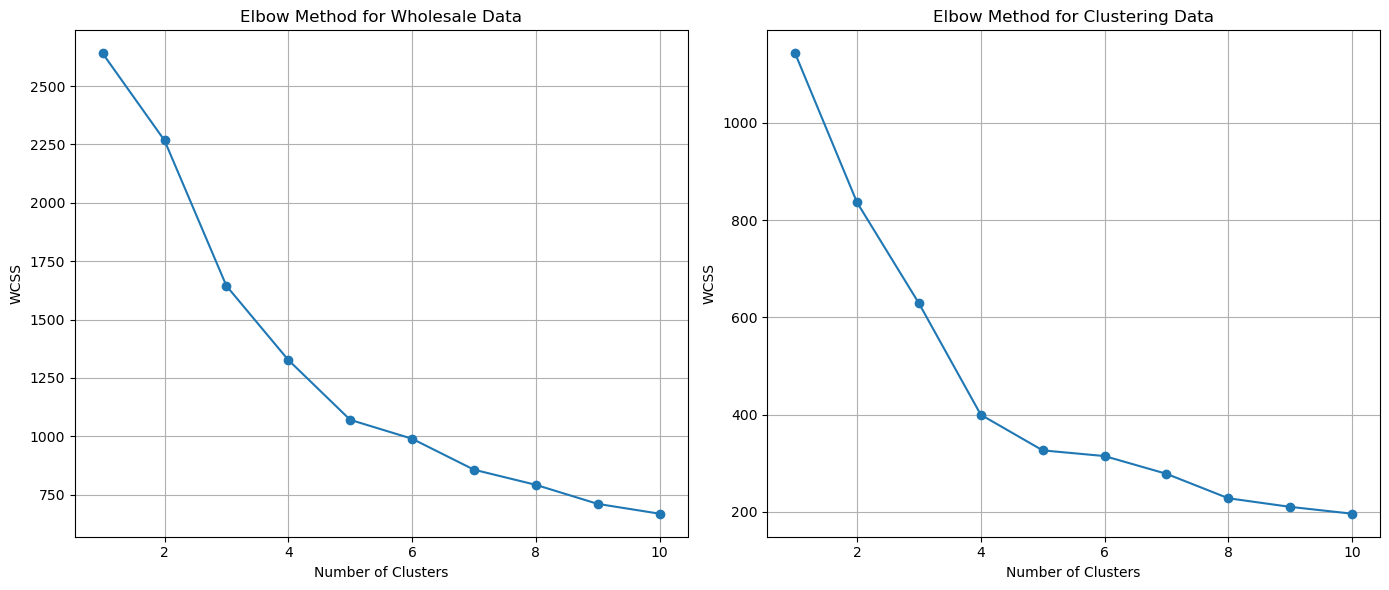

C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jeremy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


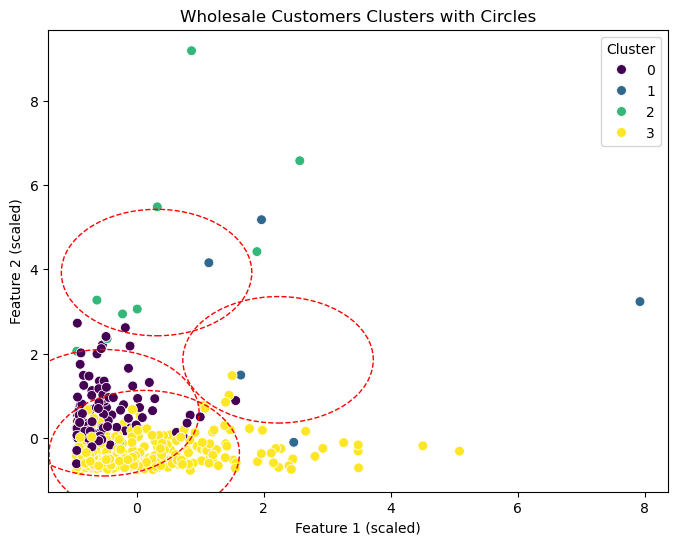

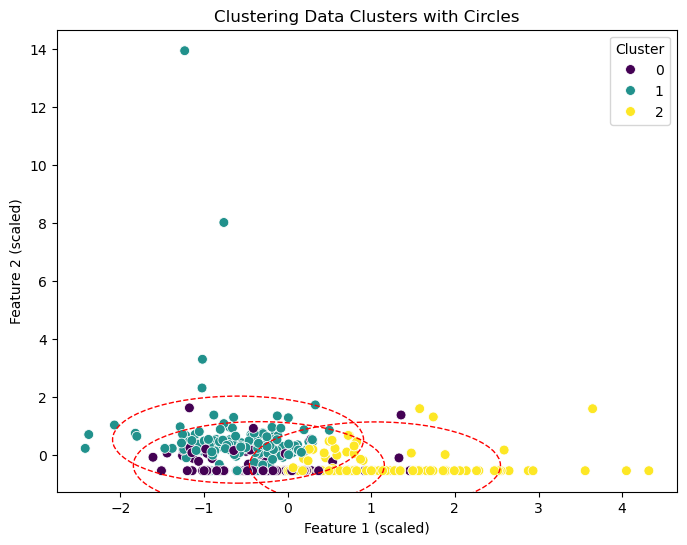

In [8]:
# Code Summary: K-Means Clustering

# This Jupyter notebook implements K-Means clustering using two datasets: "Wholesale customers data" 
# and "Clustering.csv". The workflow includes data preprocessing, finding the optimal number of 
# clusters using the Elbow method, applying K-Means clustering, and analyzing the clusters.

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the datasets
wholesale_path = "Wholesale customers data.csv"  
clustering_path = "clustering.csv"              

# Load the datasets into pandas DataFrames
wholesale_data = pd.read_csv(wholesale_path)
clustering_data = pd.read_csv(clustering_path)

# Display a preview of the datasets
print("--- Wholesale Customers Data ---")
print(wholesale_data.head())
print("\n--- Clustering Data ---")
print(clustering_data.head())

# Step 2: Preprocess the datasets
# Wholesale Customers Data
wholesale_numerical = wholesale_data.iloc[:, 2:]  # Select numerical columns for clustering
scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale_numerical)

# Clustering Data
# Handle missing values
clustering_data['Gender'].fillna('Unknown', inplace=True)
clustering_data['Dependents'].fillna('0', inplace=True)
clustering_data['Self_Employed'].fillna('No', inplace=True)
clustering_data['Loan_Amount_Term'].fillna(clustering_data['Loan_Amount_Term'].median(), inplace=True)
clustering_data['Credit_History'].fillna(0, inplace=True)

# Select numerical columns for clustering
clustering_features = clustering_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
clustering_scaled = scaler.fit_transform(clustering_features)

# Step 3: Determine the optimal number of clusters using the Elbow method
def calculate_wcss(data):
    wcss = []
    for i in range(1, 11):  # Testing clusters from 1 to 10
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for both datasets
wcss_wholesale = calculate_wcss(wholesale_scaled)
wcss_clustering = calculate_wcss(clustering_scaled)

# Plot the Elbow method results
plt.figure(figsize=(14, 6))

# Wholesale Customers Data
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_wholesale, marker='o')
plt.title('Elbow Method for Wholesale Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Clustering Data
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss_clustering, marker='o')
plt.title('Elbow Method for Clustering Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 4: Apply K-Means clustering with the optimal number of clusters
# Based on the elbow plots, let's assume 4 clusters for Wholesale and 3 for Clustering Data
kmeans_wholesale = KMeans(n_clusters=4, random_state=42)
wholesale_clusters = kmeans_wholesale.fit_predict(wholesale_scaled)

kmeans_clustering = KMeans(n_clusters=3, random_state=42)
clustering_clusters = kmeans_clustering.fit_predict(clustering_scaled)

# Add the cluster labels to the datasets
wholesale_data['Cluster'] = wholesale_clusters
clustering_data['Cluster'] = clustering_clusters

# Step 5: Visualize the clustering results
# Wholesale Customers Data Visualization (only if 2 features are used for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=wholesale_scaled[:, 0], y=wholesale_scaled[:, 1], 
    hue=wholesale_clusters, palette='viridis', s=50
)

# Add circles to the clusters in Wholesale Customers Data
for i in range(4):  # 4 clusters for Wholesale Data
    center = kmeans_wholesale.cluster_centers_[i]
    plt.gca().add_patch(plt.Circle((center[0], center[1]), 1.5, color='red', fill=False, linestyle='--'))

plt.title('Wholesale Customers Clusters with Circles')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Clustering Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_scaled[:, 0], y=clustering_scaled[:, 1], 
    hue=clustering_clusters, palette='viridis', s=50
)

# Add circles to the clusters in Clustering Data
for i in range(3):  # 3 clusters for Clustering Data
    center = kmeans_clustering.cluster_centers_[i]
    plt.gca().add_patch(plt.Circle((center[0], center[1]), 1.5, color='red', fill=False, linestyle='--'))

plt.title('Clustering Data Clusters with Circles')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Step 6: Discussion/Feedback Portion
# The clustering results provide insights into customer segmentation and grouping.
# Wholesale Data Clusters: These such groups can be used for targeted marketing or inventory management.
# Clustering Data: The clusters highlight variations in income and loan distribution, which is very useful for loan approvals.
